# Visualizing results from ENCODE NMF decomposition and demonstrating embedding of new samples into the coordinate space.

Based on 733 sample x 3.5+ million DHS Presence/Absence matrix

# 1. Import libraries & load decomposed matrices

In [1]:
import sys
sys.path.append('/Users/amuratov/gits/EncodeNMF')


In [2]:

import numpy as np
import pandas as pd
import sys 
import matplotlib.pyplot as plt


import OONMFhelpers
today  = OONMFhelpers.get_today()

In [3]:
today

'2019-07-19'

In [4]:
import OONMF

In [5]:
original_decomp = OONMF.NMFobject(16)

In [6]:
original_decomp.matrix_input_name('data/2018-06-08NC16_NNDSVD_Basis.npy', 'data/2018-06-08NC16_NNDSVD_Mixture.npy')

In [7]:
original_decomp.read_matrix_input()

verify shape

In [8]:
original_decomp.Basis.shape


(733, 16)

define color scheme

In [9]:

Comp_colors = ['#FFE500', '#FE8102', '#FF0000', '#07AF00', '#4C7D14', '#414613', '#05C1D9', '#0467FD', '#009588', '#BB2DD4', '#7A00FF', '#4A6876', '#08245B', '#B9461D', '#692108', '#C3C3C3']
neworder = np.array([16,10,7,11,2,12,1,8,4,15,14,5,9,6,3,13]).astype(int) - 1
Comp_colors = np.array(Comp_colors)[neworder]

get names of the ENCODE samples

In [10]:

sampnamePD = pd.read_table('data/sampnams_733.txt', header=None, names=['LN', 'DS', 'type'])
sampnamePD['full_name'] = sampnamePD.LN + '-' + sampnamePD.DS + '-' + sampnamePD.type
fullnames = sampnamePD.full_name.values

In [11]:
len(fullnames)

733

# 2. visualization of 16 NMF component  x 733 sample matrix

In [12]:
from OONMFhelpers import get_barsortorder

### sort the samples by majority NMF component

In [13]:
bar_graph_sort_order =get_barsortorder(original_decomp.Basis)

### first, lets do a simple heatmap. Thisi s a traditional way to visualize matrix data

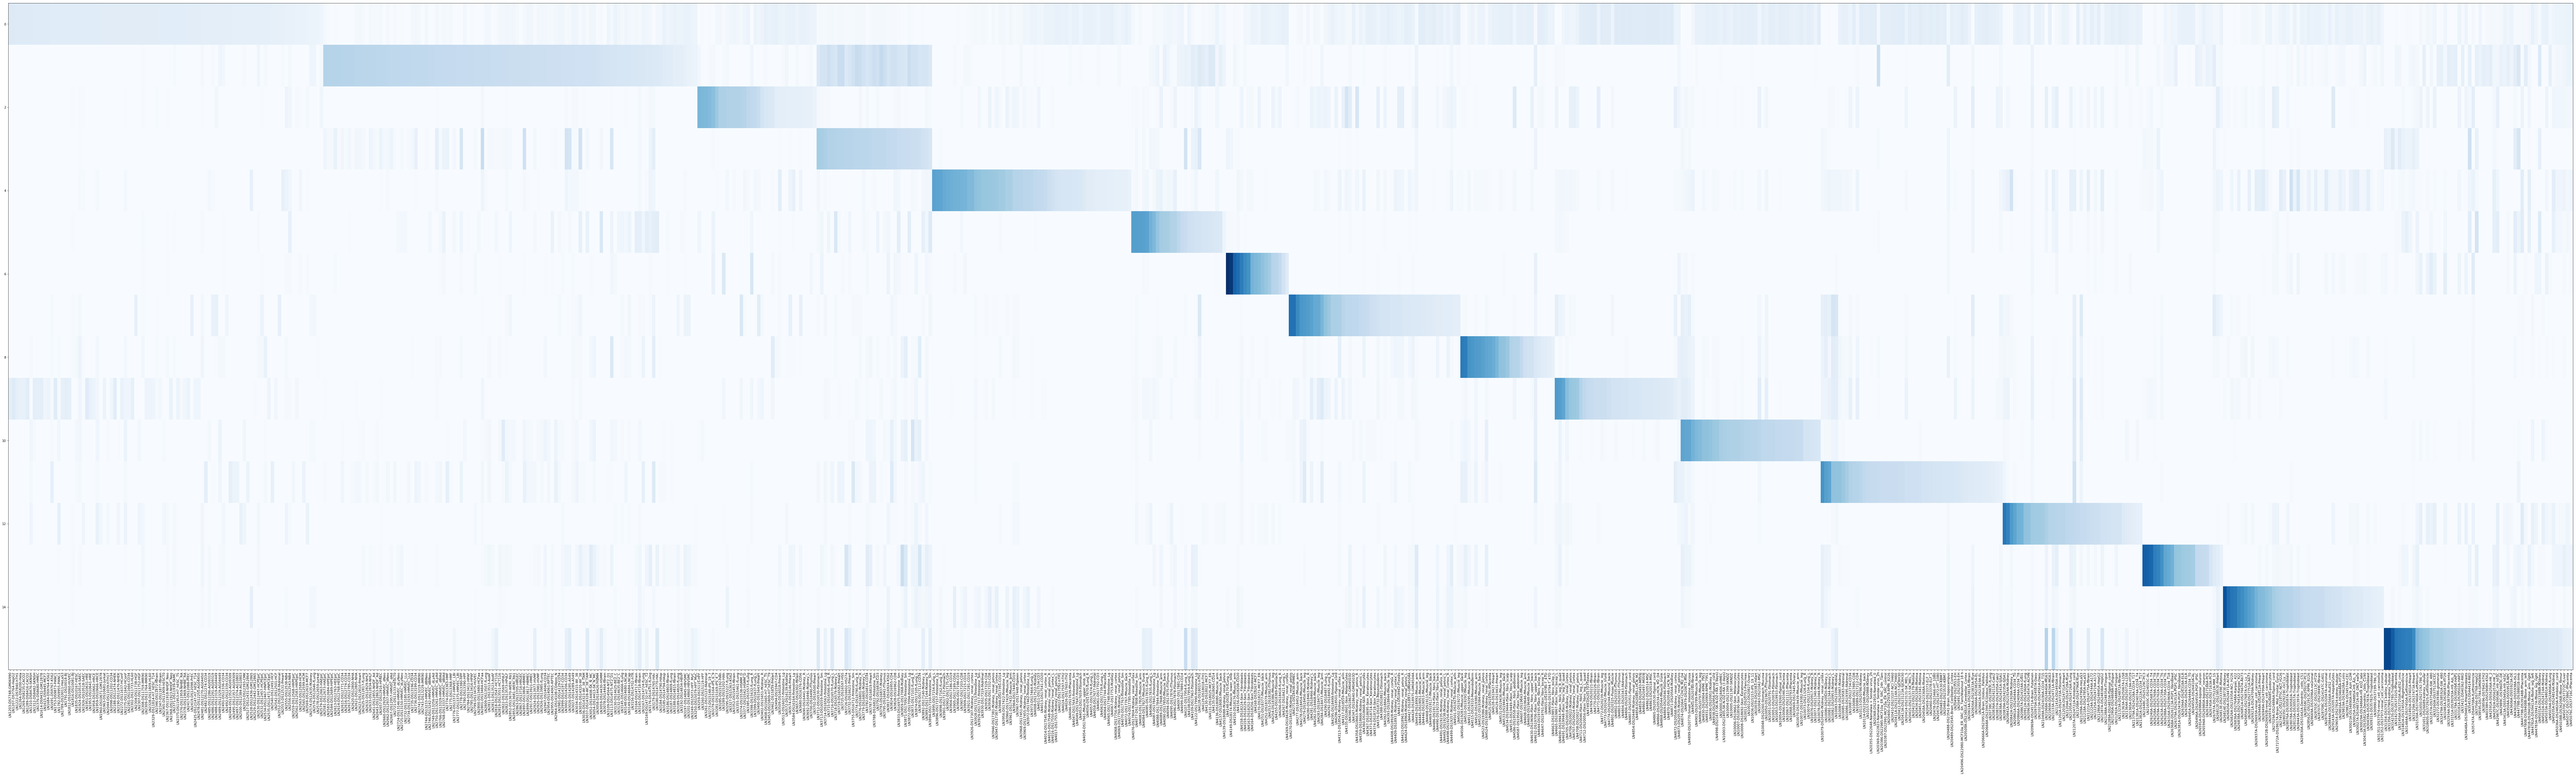

In [14]:
original_decomp.make_standard_heatmap_plot(733, original_decomp.Basis, 'test.pdf', names=np.array(fullnames), barsortorder= bar_graph_sort_order)

### to get a better semantic way to describe the components, we prefer the "stacked barplot" visualization method, assigning each NMF component to a color

<Figure size 432x288 with 0 Axes>

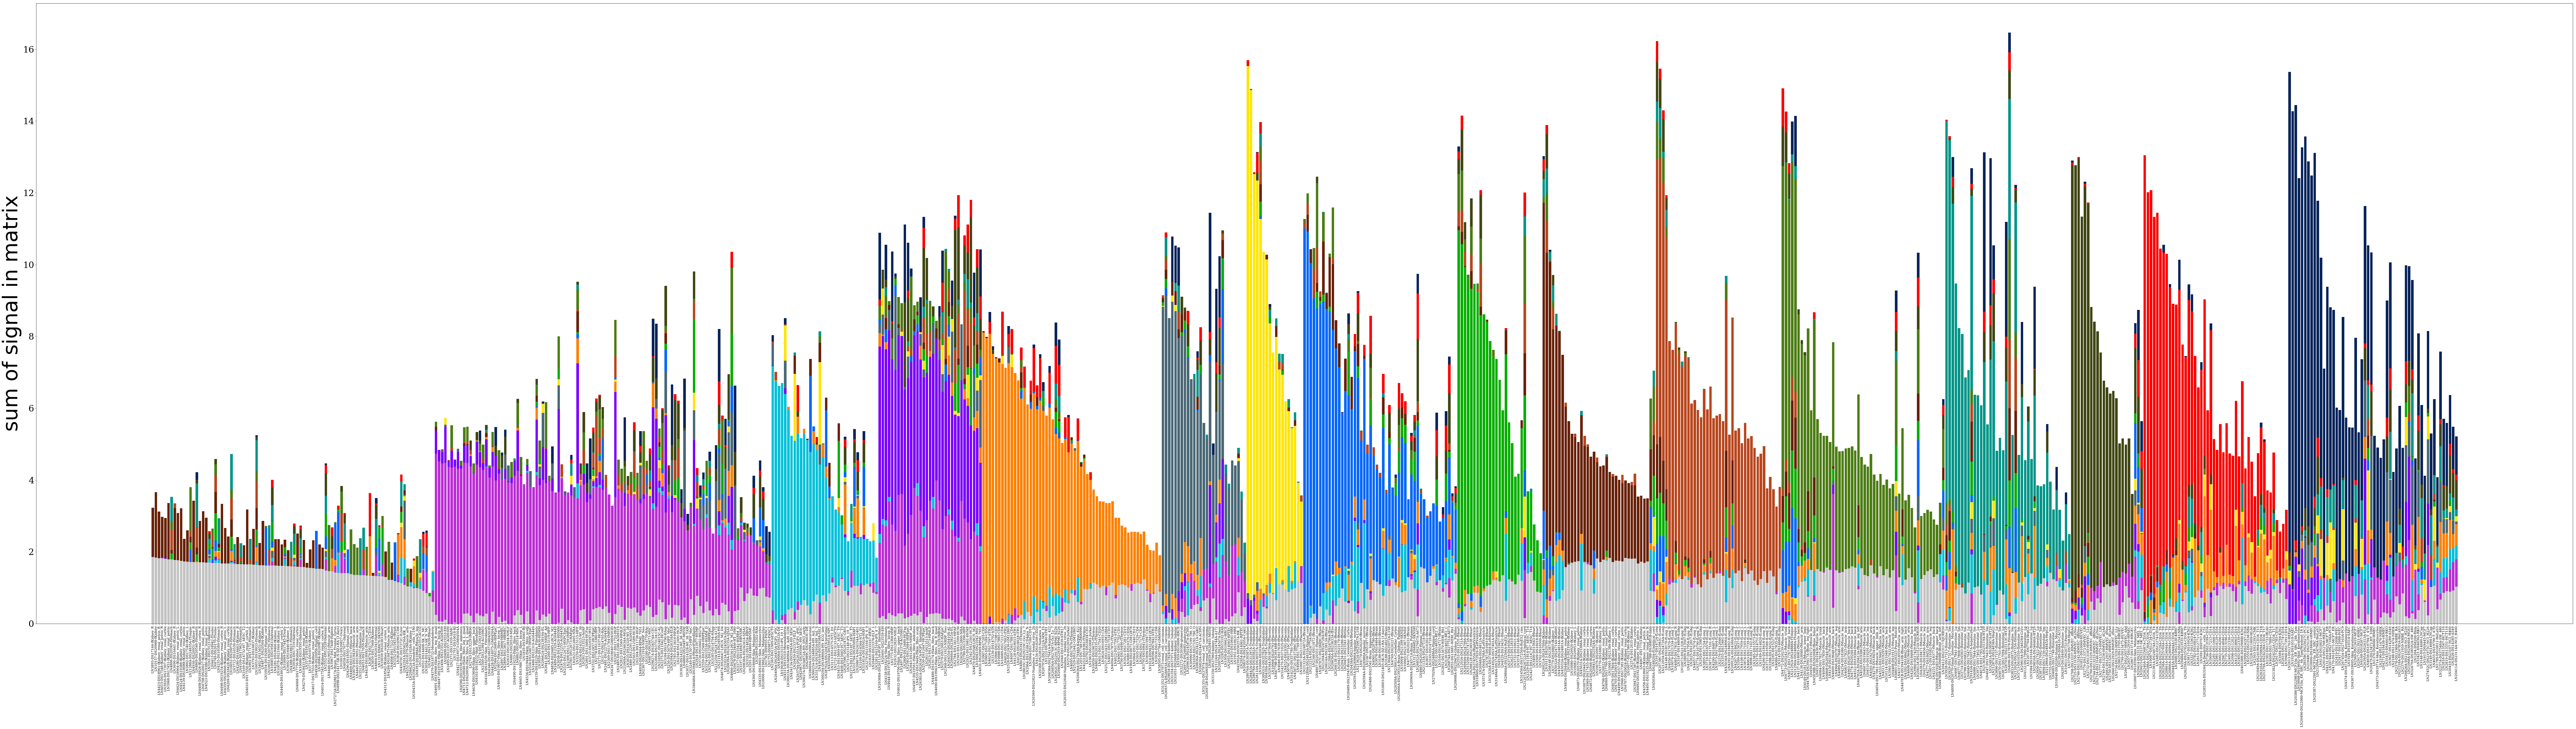

In [18]:
original_decomp.make_stacked_bar_plot(733, original_decomp.Basis.T, 'test.pdf', names=np.array(fullnames), barsortorder=bar_graph_sort_order)


In [19]:
original_decomp.Basis.shape

(733, 16)

### the organization suggests that there is very discrete structure in the data that separates groups of samples

### lets take a look at the green samples

In [20]:
heart_cut = np.argmax(original_decomp.Basis, axis=1) == 8

In [21]:
len(heart_cut[heart_cut])

27

<Figure size 432x288 with 0 Axes>

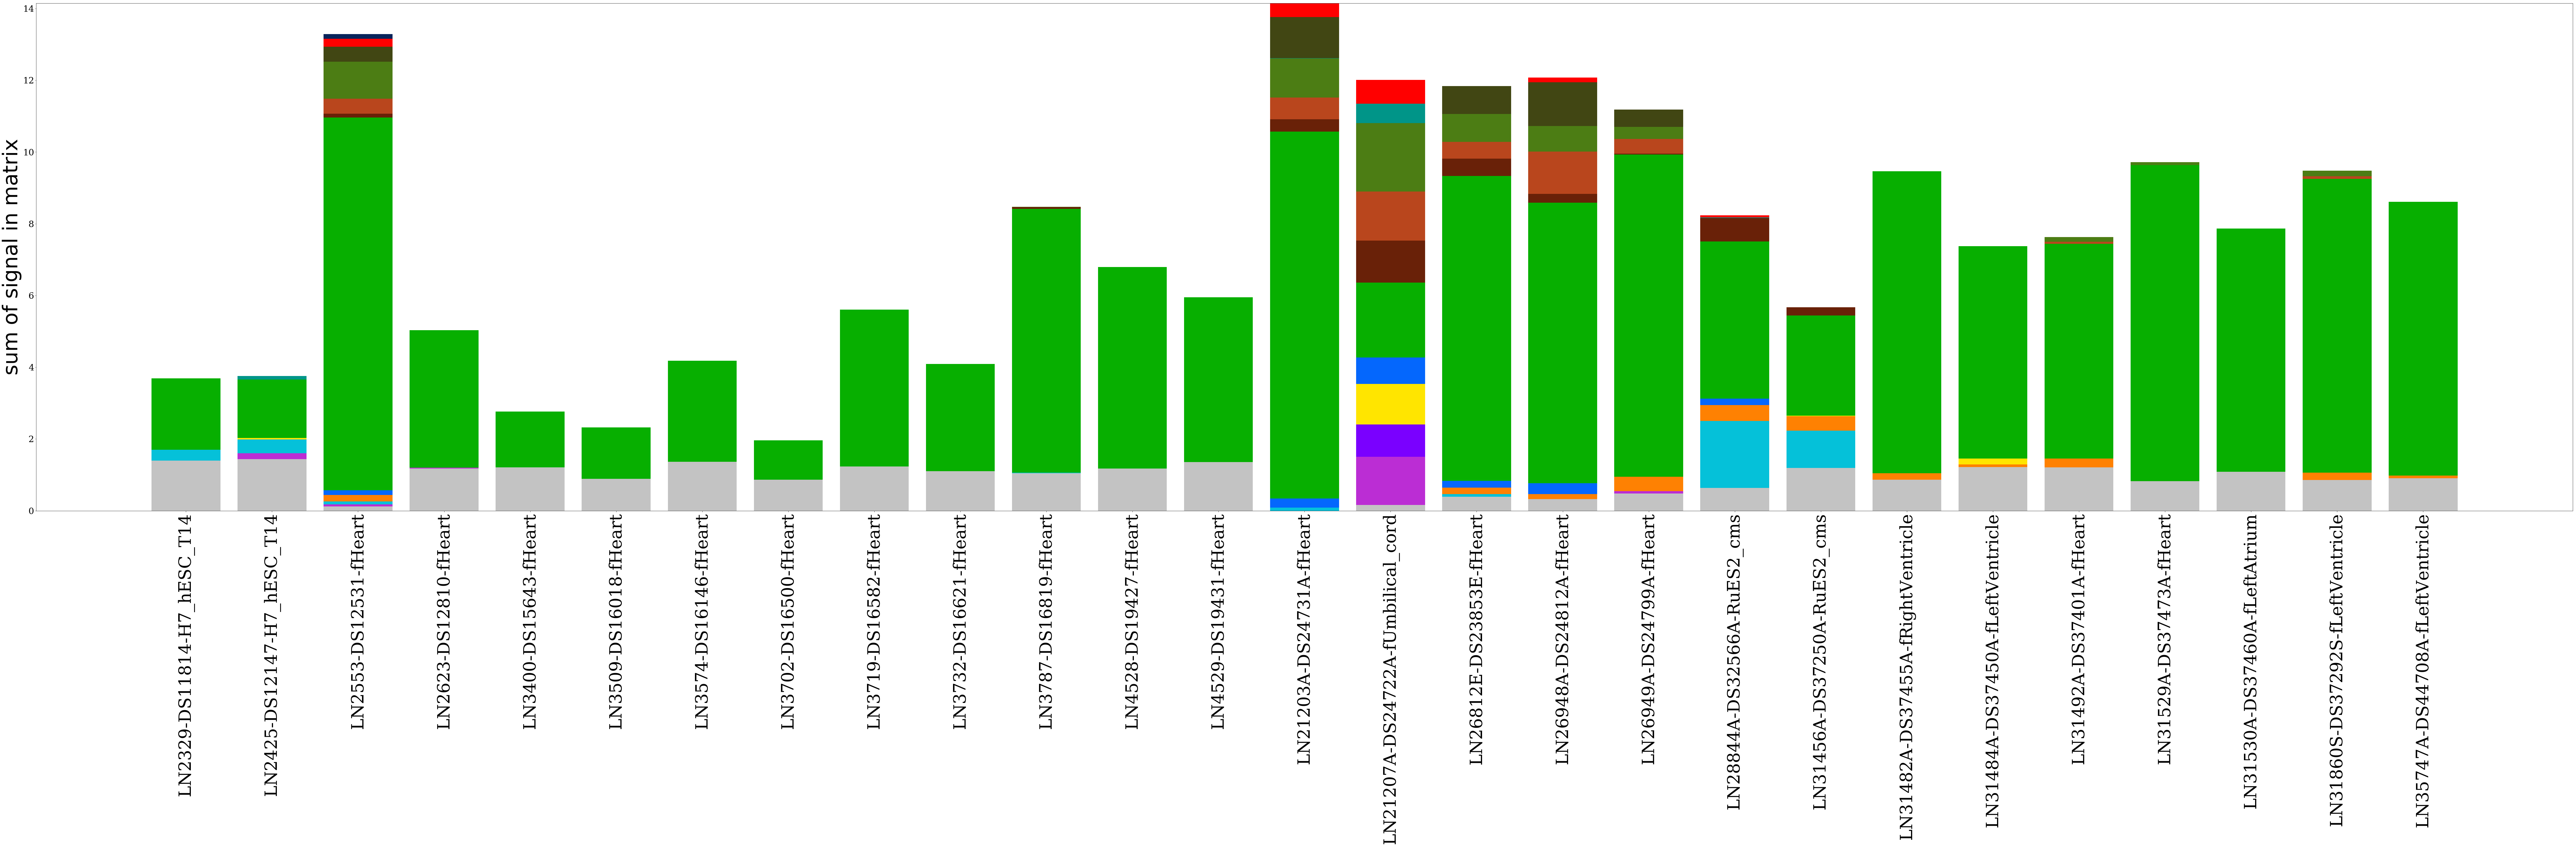

In [22]:
original_decomp.make_stacked_bar_plot(len(heart_cut[heart_cut]), original_decomp.Basis[heart_cut].T, 'test_heart.pdf', names=np.array(fullnames)[heart_cut])


In [23]:
np.array(fullnames)[heart_cut]

array(['LN2329-DS11814-H7_hESC_T14', 'LN2425-DS12147-H7_hESC_T14',
       'LN2553-DS12531-fHeart', 'LN2623-DS12810-fHeart',
       'LN3400-DS15643-fHeart', 'LN3509-DS16018-fHeart',
       'LN3574-DS16146-fHeart', 'LN3702-DS16500-fHeart',
       'LN3719-DS16582-fHeart', 'LN3732-DS16621-fHeart',
       'LN3787-DS16819-fHeart', 'LN4528-DS19427-fHeart',
       'LN4529-DS19431-fHeart', 'LN21203A-DS24731A-fHeart',
       'LN21207A-DS24722A-fUmbilical_cord', 'LN26812E-DS23853E-fHeart',
       'LN26948A-DS24812A-fHeart', 'LN26949A-DS24799A-fHeart',
       'LN28844A-DS32566A-RuES2_cms', 'LN31456A-DS37250A-RuES2_cms',
       'LN31482A-DS37455A-fRightVentricle',
       'LN31484A-DS37450A-fLeftVentricle', 'LN31492A-DS37401A-fHeart',
       'LN31529A-DS37473A-fHeart', 'LN31530A-DS37460A-fLeftAtrium',
       'LN31860S-DS37292S-fLeftVentricle',
       'LN35747A-DS44708A-fLeftVentricle'], dtype=object)

### they are all hearrt samples!!

### now lets look at blue samples

In [24]:
brain_cut =  np.argmax(original_decomp.Basis, axis=1) == 7

In [25]:
len(brain_cut[brain_cut])

49

<Figure size 432x288 with 0 Axes>

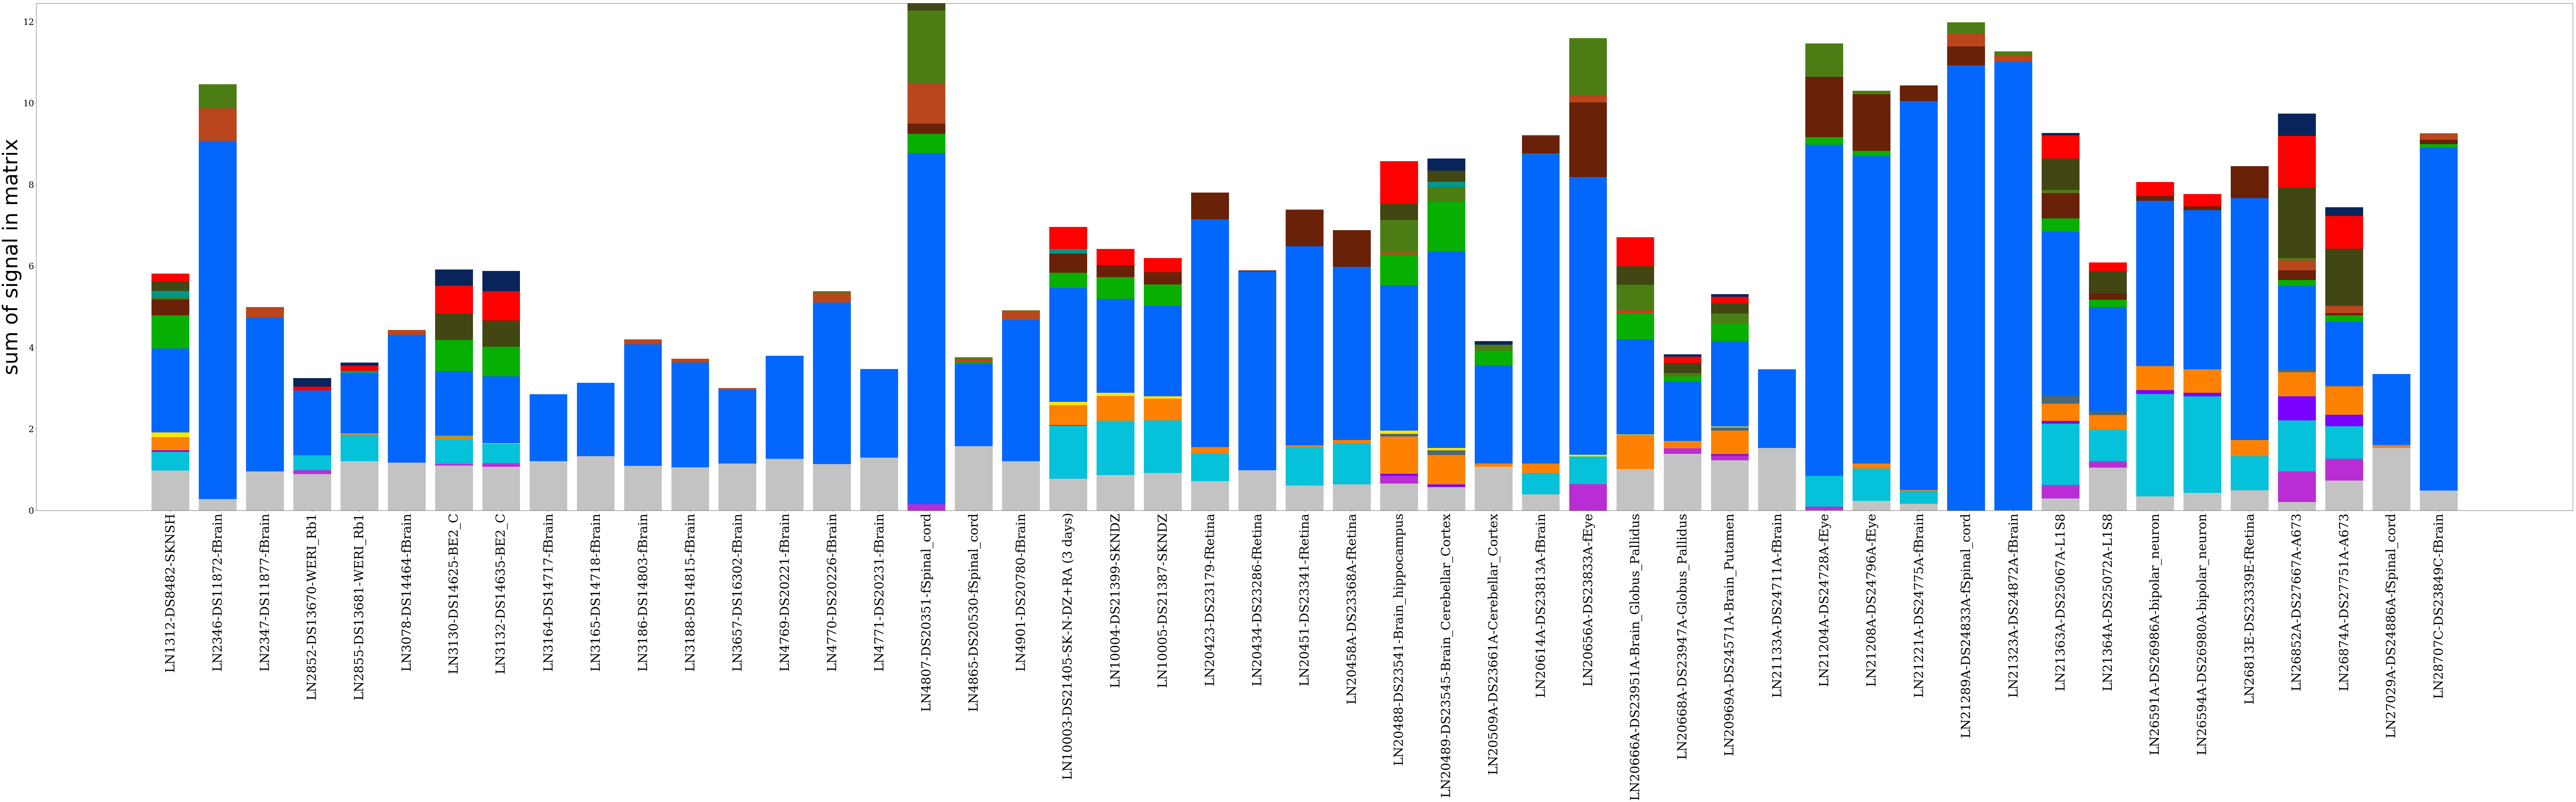

In [26]:
original_decomp.make_stacked_bar_plot(len(brain_cut[brain_cut]), original_decomp.Basis[brain_cut].T, 'test_brain.pdf', names=np.array(fullnames)[brain_cut])


In [27]:
np.array(fullnames)[brain_cut]

array(['LN1312-DS8482-SKNSH', 'LN2346-DS11872-fBrain',
       'LN2347-DS11877-fBrain', 'LN2852-DS13670-WERI_Rb1',
       'LN2855-DS13681-WERI_Rb1', 'LN3078-DS14464-fBrain',
       'LN3130-DS14625-BE2_C', 'LN3132-DS14635-BE2_C',
       'LN3164-DS14717-fBrain', 'LN3165-DS14718-fBrain',
       'LN3186-DS14803-fBrain', 'LN3188-DS14815-fBrain',
       'LN3657-DS16302-fBrain', 'LN4769-DS20221-fBrain',
       'LN4770-DS20226-fBrain', 'LN4771-DS20231-fBrain',
       'LN4807-DS20351-fSpinal_cord', 'LN4865-DS20530-fSpinal_cord',
       'LN4901-DS20780-fBrain', 'LN10003-DS21405-SK-N-DZ+RA (3 days)',
       'LN10004-DS21399-SKNDZ', 'LN10005-DS21387-SKNDZ',
       'LN20423-DS23179-fRetina', 'LN20434-DS23286-fRetina',
       'LN20451-DS23341-fRetina', 'LN20458A-DS23368A-fRetina',
       'LN20488-DS23541-Brain_hippocampus',
       'LN20489-DS23545-Brain_Cerebellar_Cortex',
       'LN20509A-DS23661A-Cerebellar_Cortex', 'LN20614A-DS23813A-fBrain',
       'LN20656A-DS23833A-fEye',
       'LN20666A-DS239

### they are all related to the nervous systems! 

### we have gone ahead and done this for all colors and assigned semantic labels to the NMF components (colors). Each of these links have been statistically verified with metadata association. 

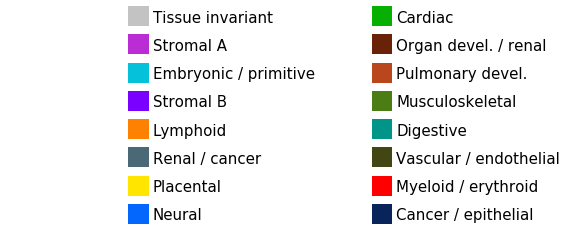

In [28]:
original_decomp.make_anatomy_key()

# 3. Visualizing new data with the same embedding

## What happens if new data is generated and we weant to represent them alongside the original 733? This is easy to accomplish with NMF.

## To demonstrate, we look at 23 new whole-genome DNase-Seq datasets for Pancreatic Cancer cell lines

### a different script performed the embedding operation. Here, we visualize how the embedding went

In [29]:
revised_decomp = OONMF.NMFobject(16)
revised_decomp.matrix_input_name('data/2018-11-09PancSpecialNC16seed20.npy', 'data/2018-06-08NC16_NNDSVD_Mixture.npy')

In [30]:
revised_decomp.read_matrix_input()

In [31]:
revised_decomp.Basis.shape

(756, 16)

In [32]:
revised_Basis_newonly = revised_decomp.Basis[733:]


In [33]:
revised_Basis_newonly.shape

(23, 16)

In [34]:

pancnames_cut = []
for name in fullnames:
    if 'PANC' in name:
        pancnames_cut.append(True)
    elif 'Pancreas' in name:
        pancnames_cut.append(True)
    else:
        pancnames_cut.append(False)

### we will want to compare the pancreatic cancer samples from the previous embedding to the new ones.
This pulls them out. Also we assign names to the new cell lines

In [35]:
pancnames_cut = np.array(pancnames_cut)
len(pancnames_cut[pancnames_cut])

3

In [36]:
finname = 'data/alex_LN_names.txt'
f = open(finname, 'r')
dars = f.readlines()
pank_LN_ar = []
for line in dars:
    pank_LN_ar.append(line.strip())
f.close()

In [37]:
#combined list of names
allnames = fullnames.tolist() + pank_LN_ar


In [38]:
barsortorder = get_barsortorder(revised_decomp.Basis)


### visualization with new samples. Looks like the old one

<Figure size 432x288 with 0 Axes>

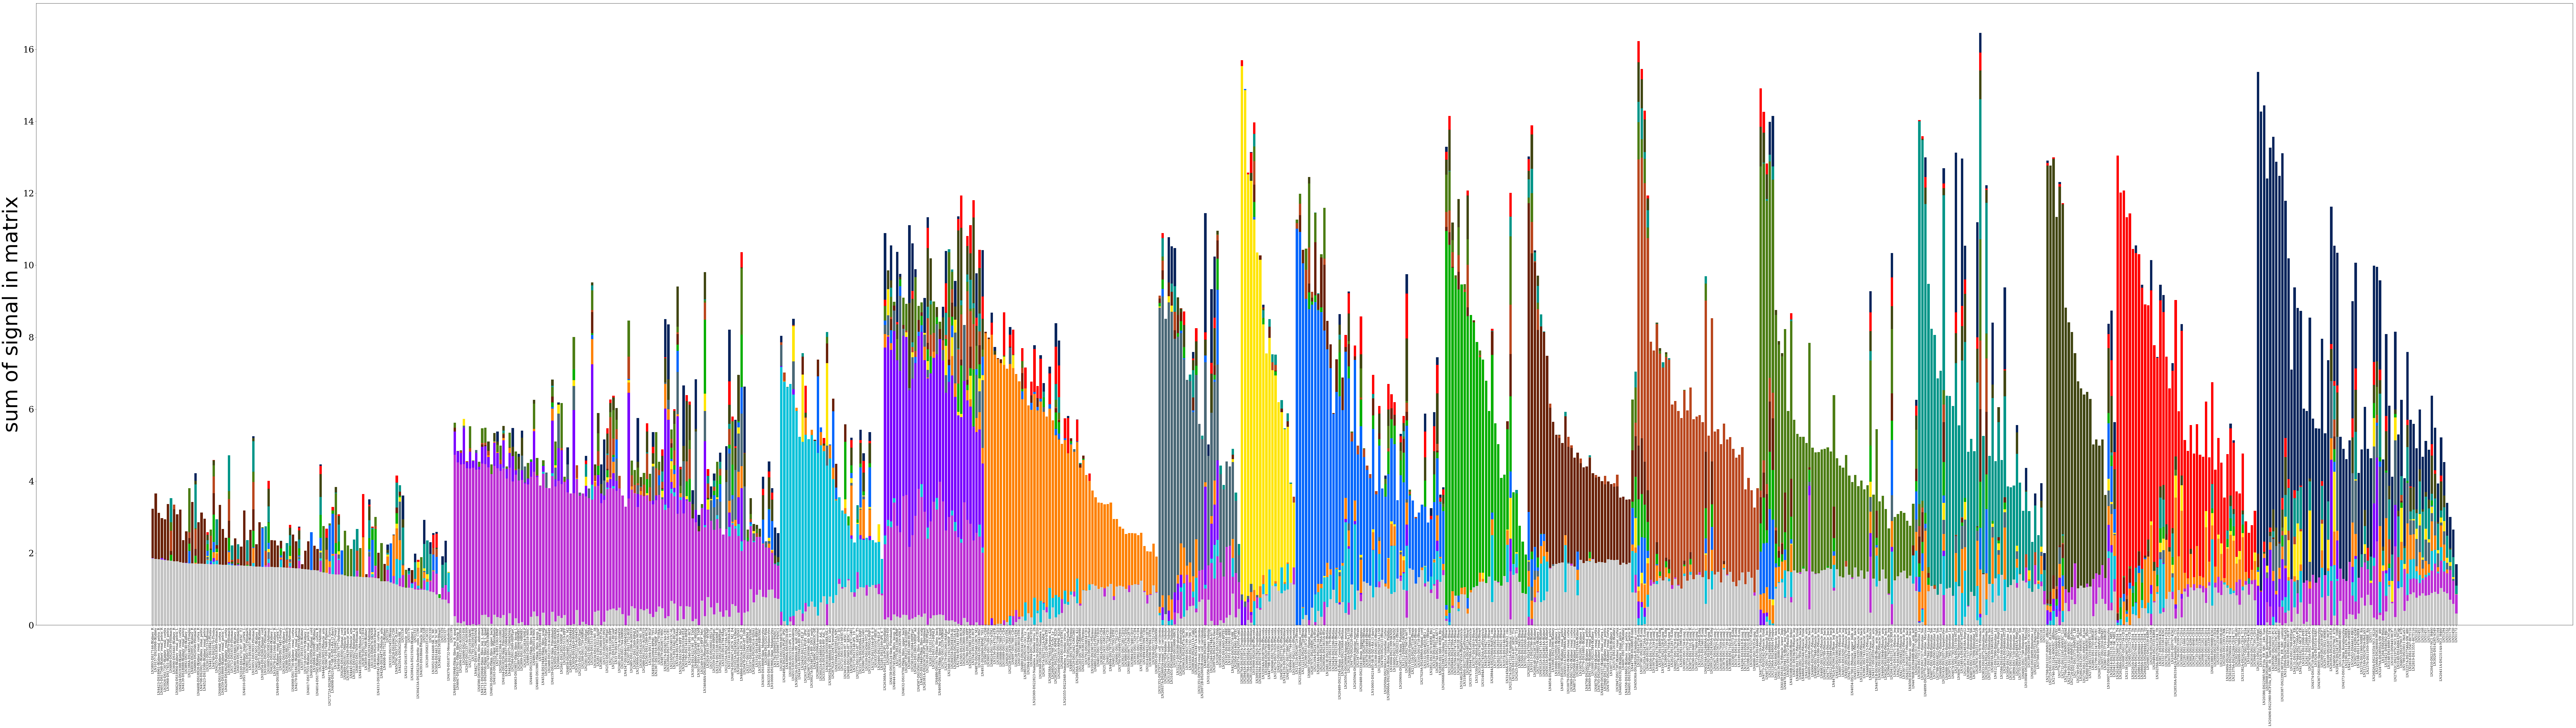

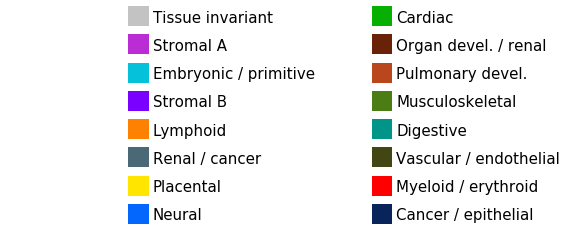

In [39]:
revised_decomp.make_stacked_bar_plot(756, revised_decomp.Basis.T, 'test.pdf', names=np.array(allnames), barsortorder=barsortorder)
original_decomp.make_anatomy_key()

In [40]:
old_new_panc = np.concatenate([original_decomp.Basis[pancnames_cut],revised_Basis_newonly ])
old_new_panc_names = np.array(fullnames[pancnames_cut]).tolist() + pank_LN_ar

### now we visualize old and new pancreatic cancer samples. The first 3 are from the old samples.  They are mostly a mixture of "Tissue invariant", "Stromal", and "Cancer/epithelial" NMF components. Only one sample has "digestive" association. 

### The new samples contain more "digestive" component (and a few others).  Generally look similar  to older ones

<Figure size 432x288 with 0 Axes>

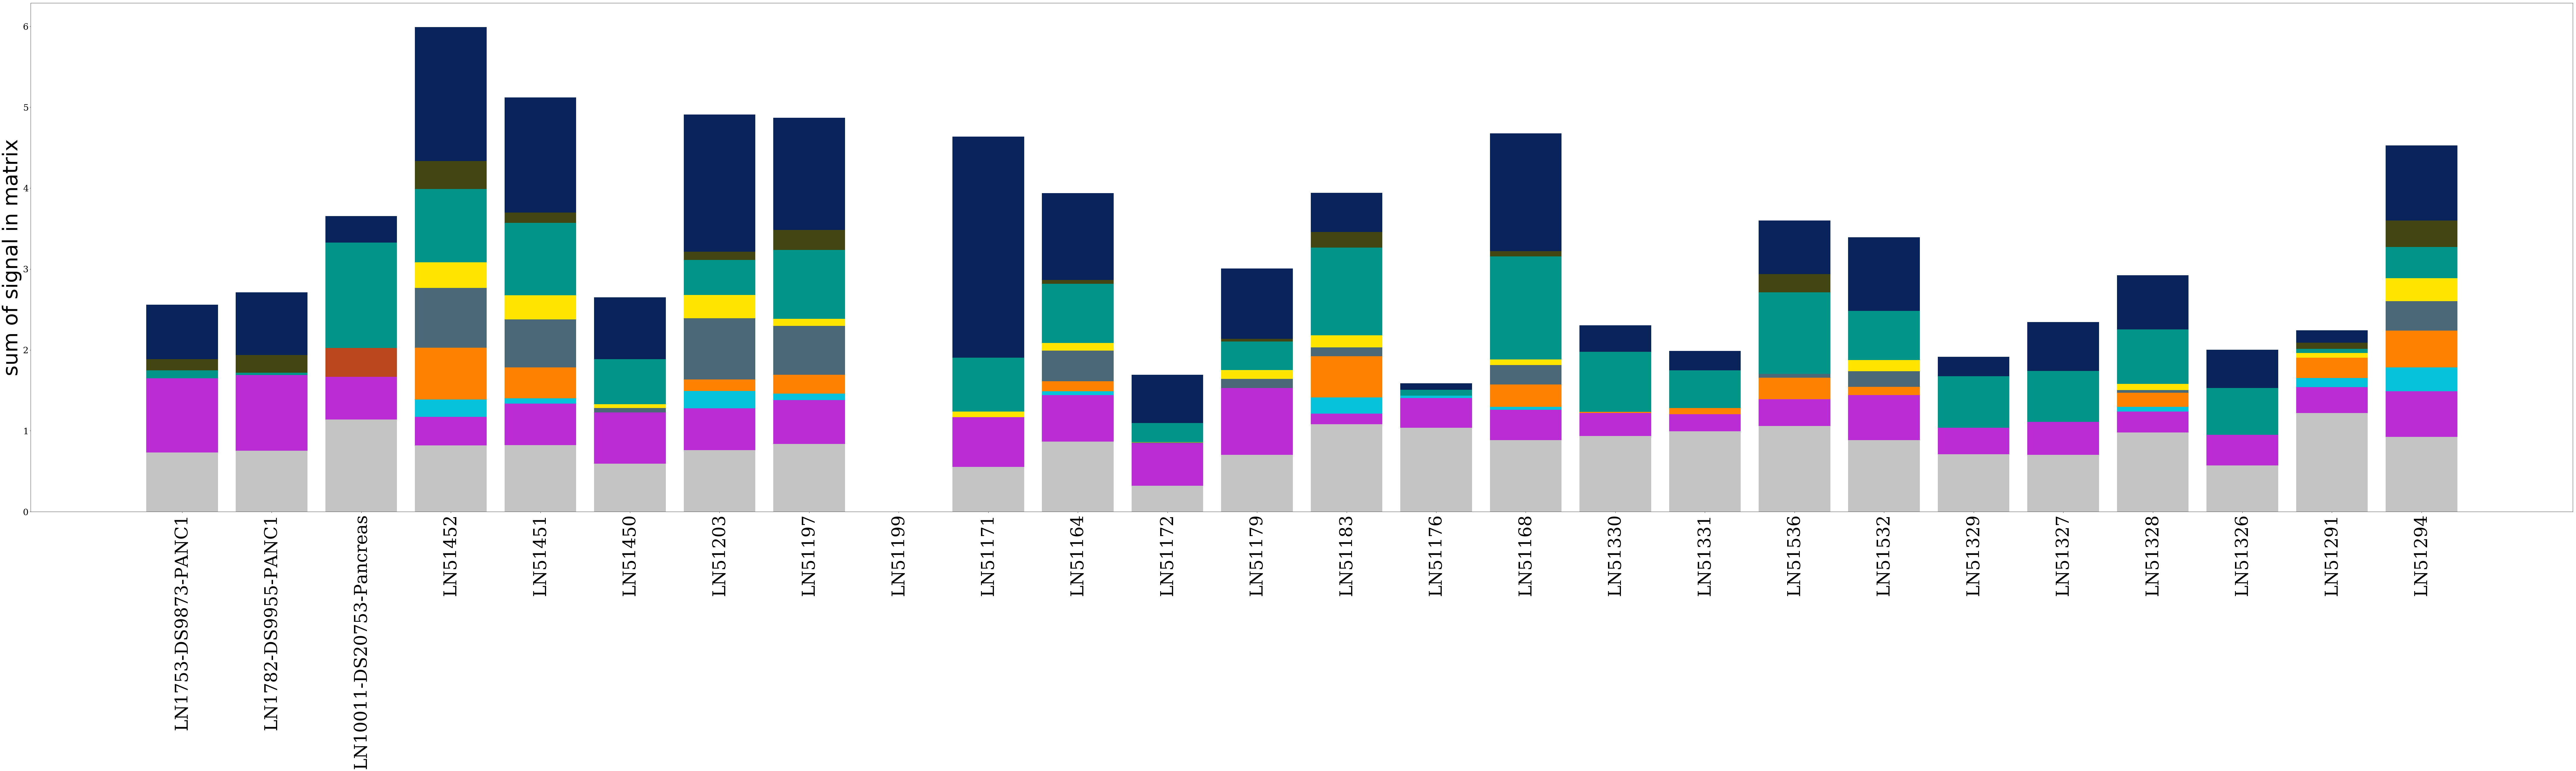

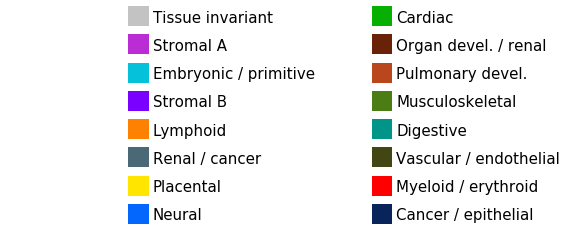

In [41]:
original_decomp.make_stacked_bar_plot(26, old_new_panc.T, '', names=np.array(old_new_panc_names))
original_decomp.make_anatomy_key()

### We can see how samples relate to each other with a simple UMAP embedding. 

In [42]:
import umap


In [43]:
reducer = umap.UMAP(min_dist=0.5, n_neighbors=20, random_state=33)


In [44]:
embedding = reducer.fit_transform(original_decomp.Basis)


In [45]:
majcomp = np.argmax(original_decomp.Basis, axis=1)


<Figure size 432x288 with 0 Axes>

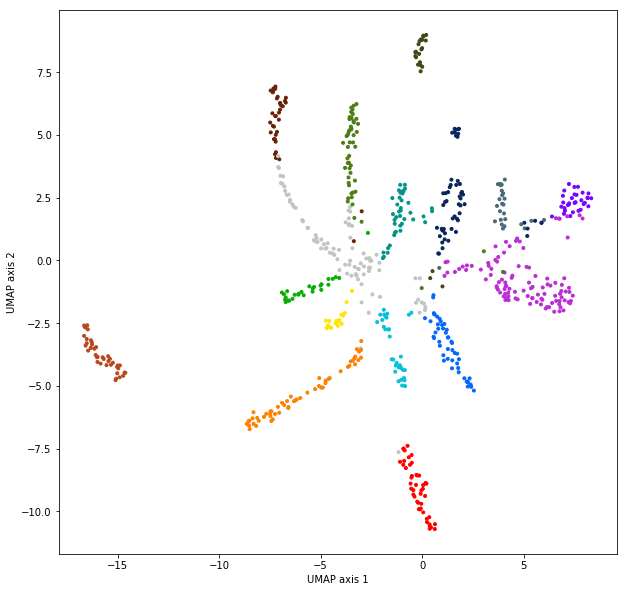

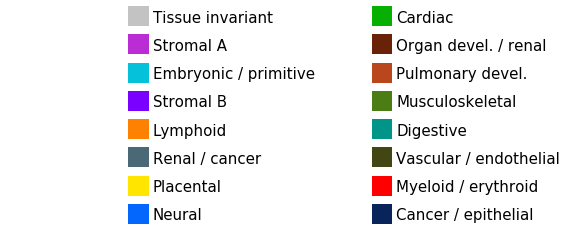

In [46]:

plt.clf()
plt.figure(figsize=(10,10))
plt.scatter(embedding[:,0], embedding[:,1], color=Comp_colors[majcomp], alpha=1, marker='.')
plt.ylabel('UMAP axis 2')
plt.xlabel('UMAP axis 1')
plt.show()
original_decomp.make_anatomy_key()

### And finally, we can see where the new samples lie in relation to the old samples

In [47]:
newdata = reducer.transform(revised_Basis_newonly)


In [48]:
majcomp_new = np.argmax(revised_Basis_newonly, axis=1)


<Figure size 432x288 with 0 Axes>

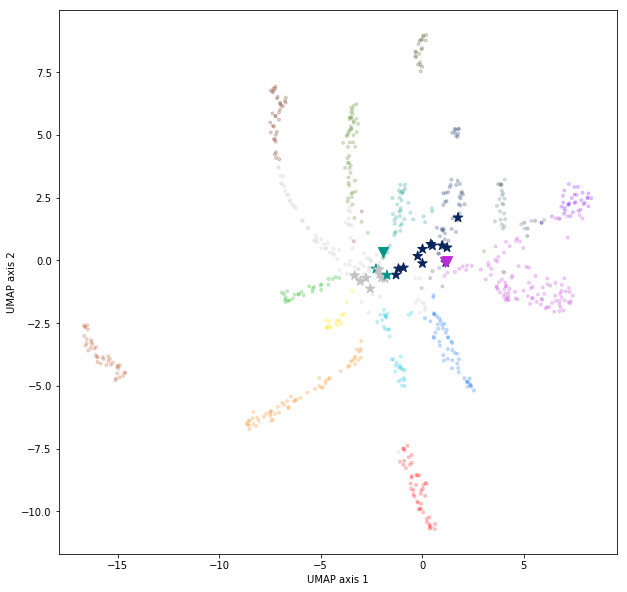

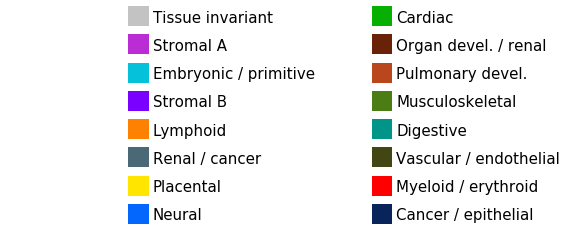

In [49]:

plt.clf()
plt.figure(figsize=(10,10))
plt.scatter(embedding[:,0], embedding[:,1], color=Comp_colors[majcomp], alpha=0.2, marker='.')
plt.scatter(newdata[:,0], newdata[:,1], color=Comp_colors[majcomp_new], alpha=1, marker='*', s=100)
plt.scatter(embedding[:,0][pancnames_cut], embedding[:,1][pancnames_cut], color=Comp_colors[majcomp[pancnames_cut]], alpha=1, marker='v', s=100)

plt.ylabel('UMAP axis 2')
plt.xlabel('UMAP axis 1')
plt.show()
original_decomp.make_anatomy_key()

### pretty solid! 